# Coups Project

Data Citation:
Peyton, Buddy; Bajjalieh, Joseph; Shalmon, Dan; Martin, Michael; Bonaguro, Jonathan (2021): Cline Center Coup D’état Project Dataset. University of Illinois at Urbana-Champaign. https://doi.org/10.13012/B2IDB-9651987_V3 

# Load the Data

In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
coup = pd.read_csv("Coup_Data_v2.0.0.csv")


# EDA

**How many observations are there? Is there missing data? What predictors are available?**

In [ ]:
coup.info()

Chosen response variable: **Realized**

**Which countries have had the most coups?**

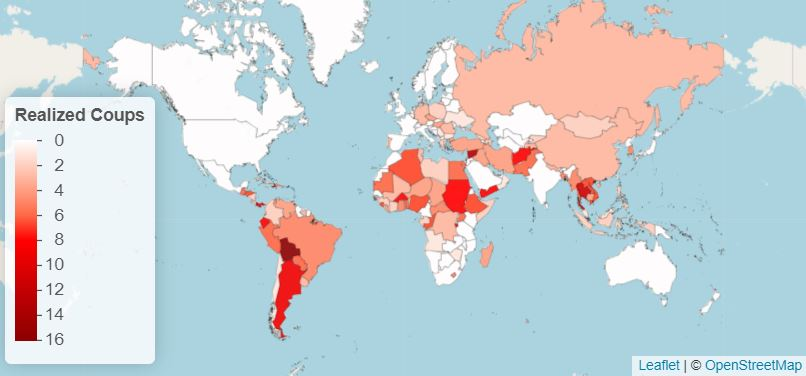

**How doe each predictor vary between realized and not realized coups?**

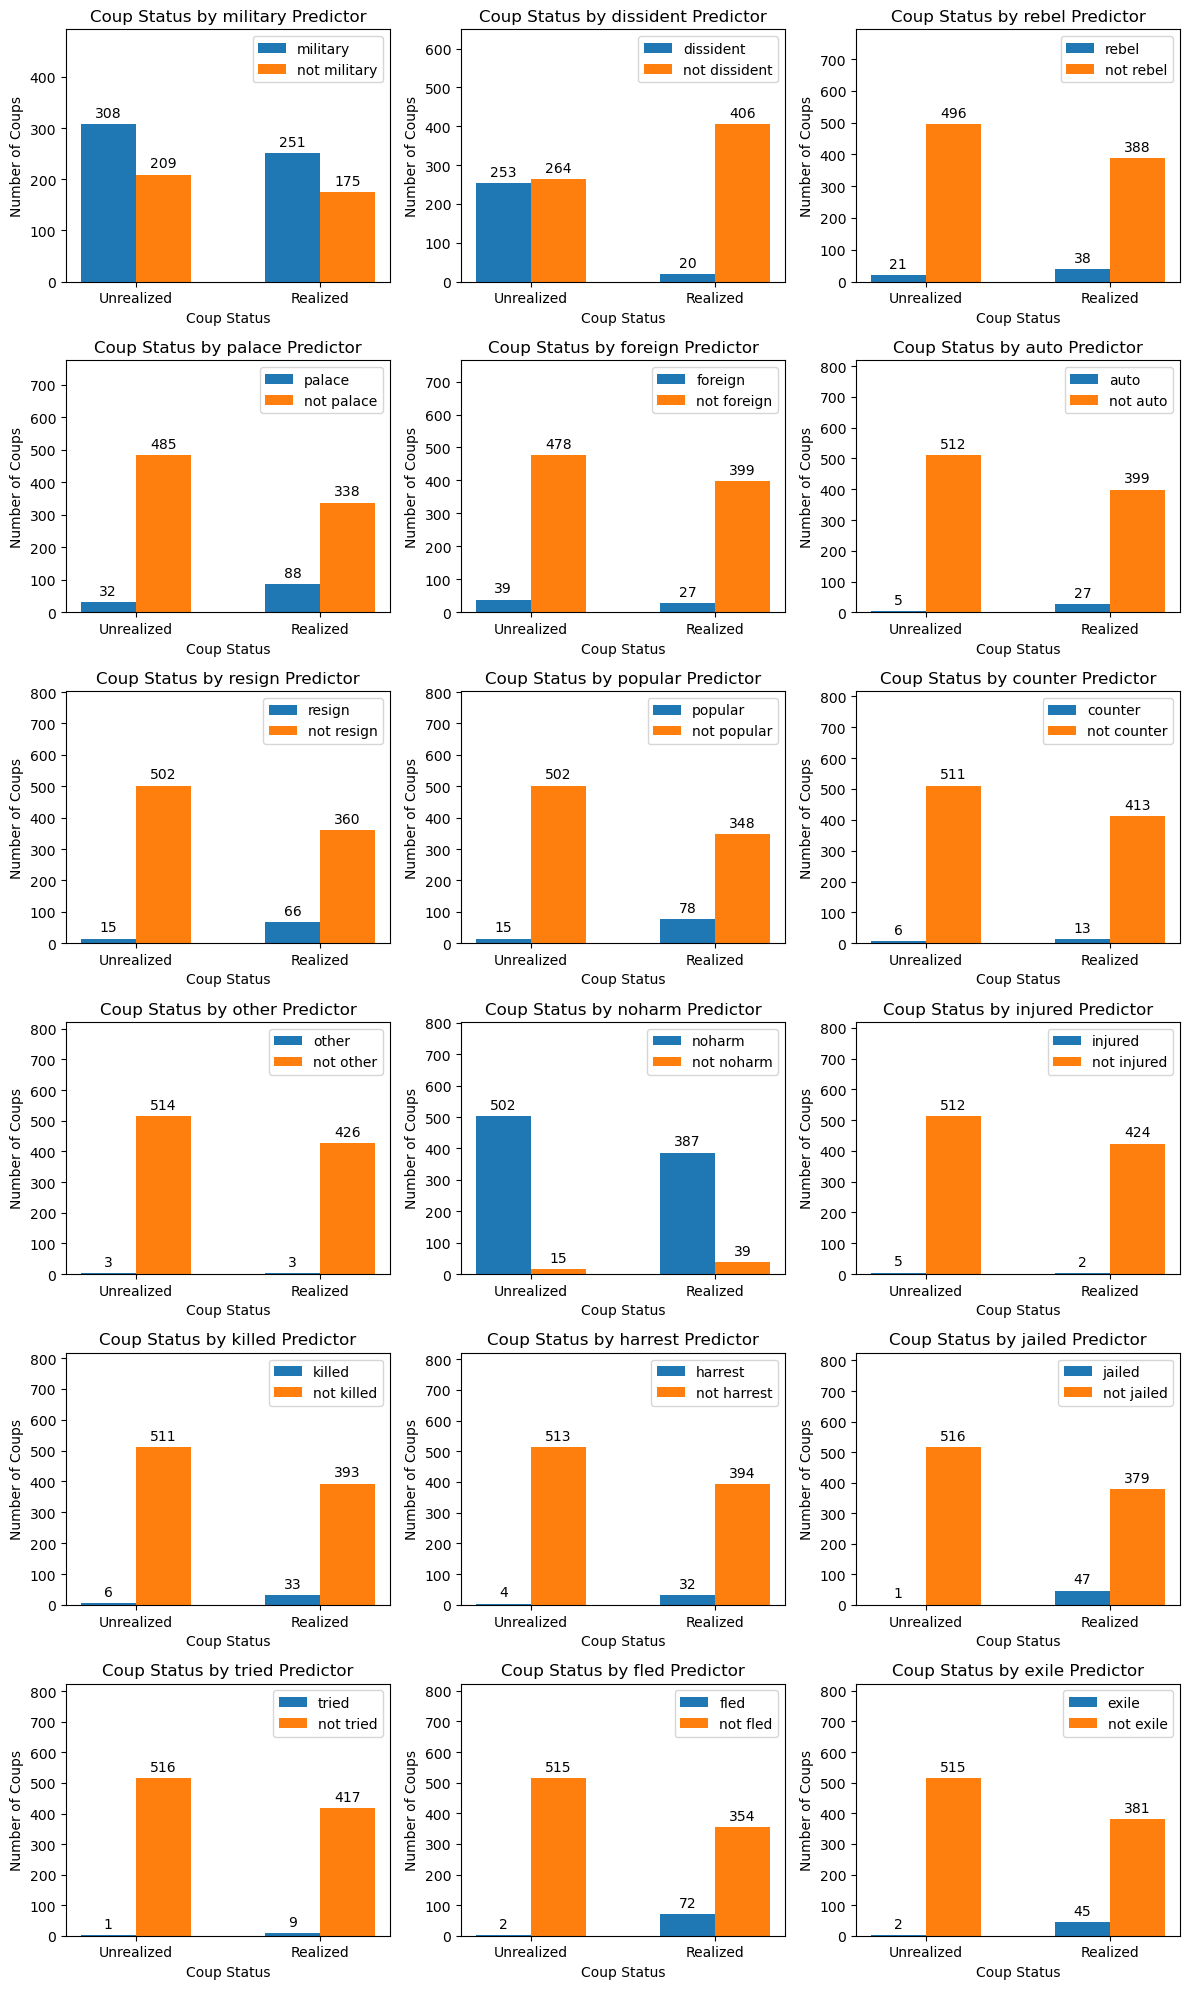

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [137]:
fig, ax = plt.subplots(6,3, figsize=(12,20))
plotsy = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5]
plotsx = [0,1,2] *6
for i in range(len(predictors)):
    plt.figure()
    temp0 = pd.DataFrame(coup[coup[predictors[i]] == 0]['realized'].value_counts()).sort_index()
    temp1 = pd.DataFrame(coup[coup[predictors[i]] == 1]['realized'].value_counts()).sort_index()
    labels = ['Unrealized', 'Realized']
    admit = temp1.iloc[:,0].to_list()
    not_admit = temp0.iloc[:,0].to_list()
    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars
    rects1 = ax[plotsy[i],plotsx[i]].bar(x - width/2, admit, width, label =predictors[i])#, label='Parent is Alumni')
    rects2 = ax[plotsy[i],plotsx[i]].bar(x + width/2, not_admit, width, label = 'not ' + predictors[i])#, label='Parent Not Alumni')
    ax[plotsy[i],plotsx[i]].set_ylabel('Number of Coups')
    ax[plotsy[i],plotsx[i]].set_xlabel('Coup Status')
    ax[plotsy[i],plotsx[i]].set_title('Coup Status by ' + predictors[i] +' Predictor')
    ax[plotsy[i],plotsx[i]].set_xticks(x, labels)
    ax[plotsy[i],plotsx[i]].legend()
    ax[plotsy[i],plotsx[i]].bar_label(rects1, padding=3)
    ax[plotsy[i],plotsx[i]].bar_label(rects2, padding=3)
    ax[plotsy[i],plotsx[i]].margins(y=.6)
fig.tight_layout()
plt.show()

**What is the distribution of coups over time?**

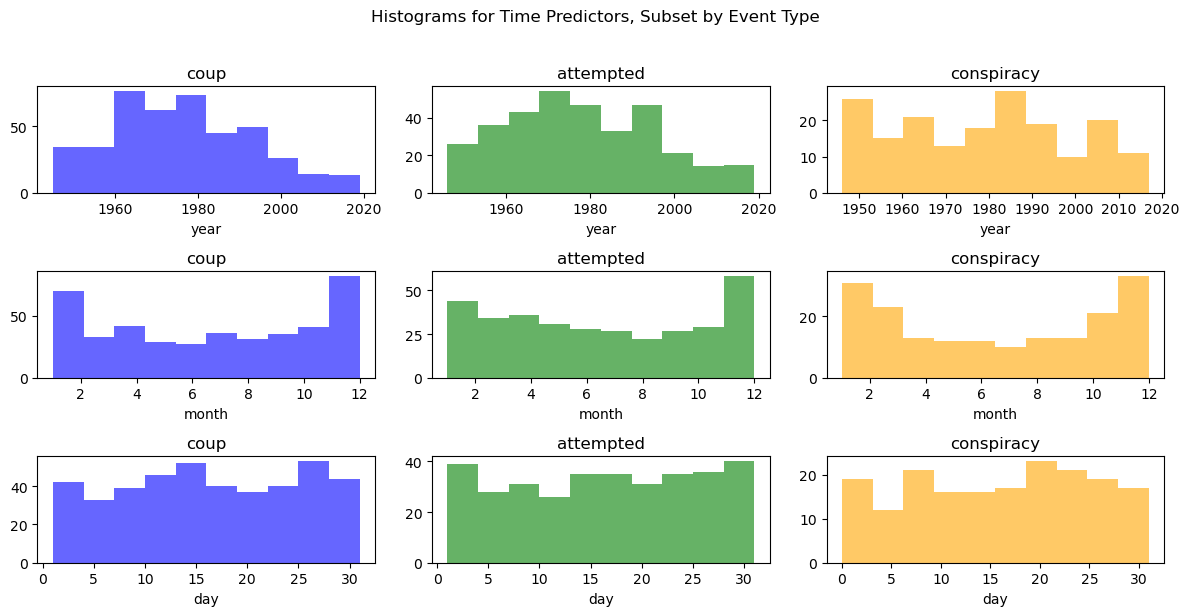

In [139]:
colors = ['blue', 'green', 'orange']
time_preds = ['year', 'month', 'day']
fig, axs = plt.subplots(3,3, figsize=(12,6))
for j in range(len(time_preds)):
    pred = time_preds[j]
    for i in range(len(coup.event_type.unique())):
        event = coup.event_type.unique()[i]
        plt.sca(axs[j,i])
        subset = coup.loc[coup.event_type == event]
        plt.hist(subset[pred], color=colors[i], alpha=.6)
        plt.title(event)
        plt.xlabel(pred)

plt.suptitle("Histograms for Time Predictors, Subset by Event Type", y=1.02)
plt.tight_layout()

# PCA ATTEMPT

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [152]:
# Split into train and test data
y = coup['realized'] 
X = coup[['cowcode','military','dissident','rebel','palace','foreign','auto','resign','popular','counter','other','noharm','injured','killed','harrest','jailed','tried','fled','exile']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stadardize
scaler = StandardScaler().fit(np.concatenate([X_train.values, X_test.values]))
X_std_train = scaler.transform(X_train)
X_std_test = scaler.transform(X_test)


K = [1,2,3,4,5,6,8,10,12,15,19]
mean_val_mse = []
for k in K:
    pca = PCA(n_components=k).fit(X_std_train)
    X_train_pca = pca.transform(X_std_train)
    lin_reg = LinearRegression(fit_intercept=True)
    mse_score = cross_validate(
        lin_reg,
        X_train_pca,
        y_train,
        cv=10,
        scoring="neg_mean_squared_error",
        return_train_score=True,
    )
    mean_val_mse.append(np.mean(-mse_score["test_score"]))
best_k = K[mean_val_mse.index(min(mean_val_mse))]
print(f"The best k is {best_k}.")

C:\Your\Root\Prefix\envs\cs109a\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Your\Root\Prefix\envs\cs109a\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


The best k is 19.


In [153]:
# Fit the PCA transformation
pca = PCA(n_components=best_k).fit(X_std_train)

# Apply PCA tranformation
X_train_pca = pca.transform(X_std_train)
X_test_pca = pca.transform(X_std_test)

# Fit linear regression
lin_reg = LinearRegression(fit_intercept=True).fit(X_train_pca, y_train)
pcr_train_r2 = lin_reg.score(X_train_pca, y_train)
pcr_test_r2 = lin_reg.score(X_test_pca, y_test)
print(f"PCR train R^2: {pcr_train_r2:.4f}")
print(f"PCR test R^2: {pcr_test_r2:.4f}")

PCR train R^2: 0.4854
PCR test R^2: 0.4762


# Initial Lasso Attempt

In [163]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [169]:
best_deg = 4

#Compute the polynomial features for best degree
x_poly_train = PolynomialFeatures(
    best_deg, include_bias=False
).fit_transform(X_train)
x_poly_test = PolynomialFeatures(
    best_deg, include_bias=False
).fit_transform(X_test)

# Fit a linear regression model
lasso = Lasso(
    max_iter=1000,
    alpha = 0.001,
    fit_intercept=True,
)
lasso.fit(x_poly_train, y_train)

# Generate predictions
y_train_pred = lasso.predict(x_poly_train)
y_test_pred = lasso.predict(x_poly_test)

print({'train_mse': mean_squared_error(y_train, y_train_pred),
                'test_mse': mean_squared_error(y_test, y_test_pred)
               })

{'train_mse': 0.08930680111795739, 'test_mse': 0.29189754354451086}


C:\Your\Root\Prefix\envs\cs109a\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.462e+01, tolerance: 1.862e-02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
'coup_id',
'cowcode',
'country',
'year',
'month',
'day',
'event_type',
'unrealized',
'realized',
'conspiracy',
'attempt',
'military',
'dissident',
'rebel',
'palace',
'foreign',
'auto',
'resign',
'popular',
'counter',
'other',
'noharm',
'injured',
'killed',
'harrest',
'jailed',
'tried',
'fled',
'exile',

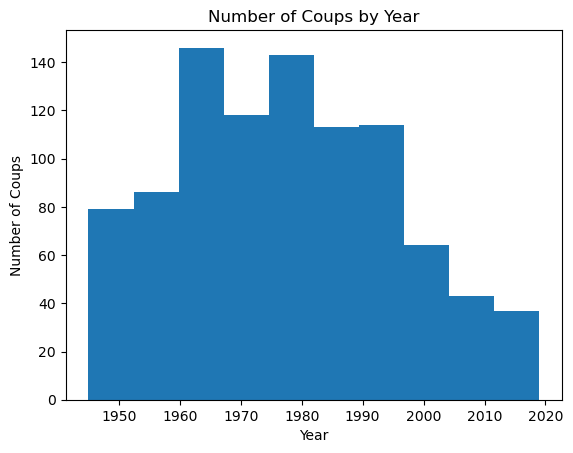

In [135]:
plt.hist(coup["year"])
plt.title('Number of Coups by Year')
plt.xlabel('Year')
plt.ylabel('Number of Coups')
plt.show()

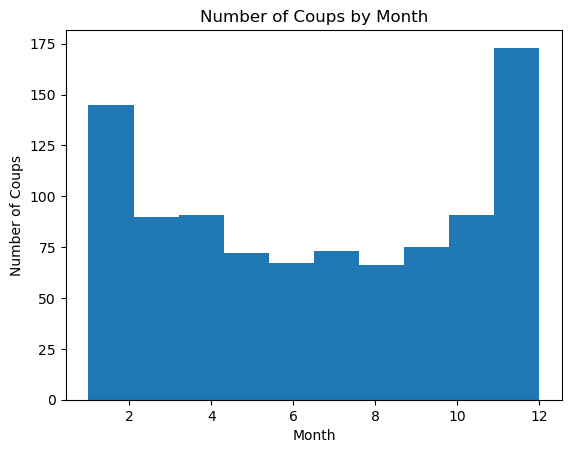

In [134]:
plt.hist(coup["month"])
plt.title('Number of Coups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Coups')
plt.show()

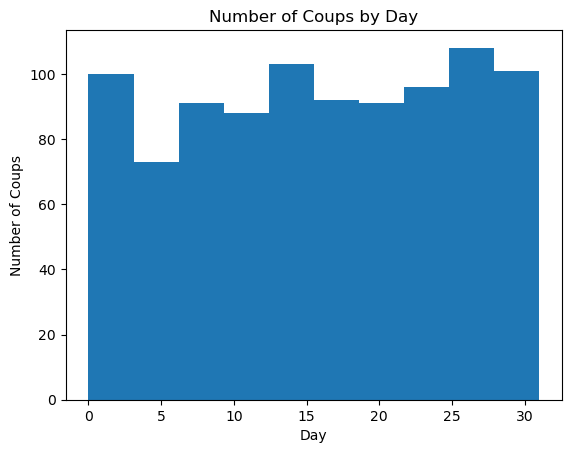

In [136]:
plt.hist(coup["day"])
plt.title('Number of Coups by Day')
plt.xlabel('Day')
plt.ylabel('Number of Coups')
plt.show()

Notes from the Codebook:

*   "Unrealized" coups are both ones that were interrupted while planning, and ones that were executed but failed.
  * includes conspiracies and attempted coups as 2 subtypes
*   "Realized" coups do not need to take over ruling the country, they just need to achieve their goal (e.g., murder)
*   Not sure how sklearn handles indicators, but effectively this data is categorical variables broken up into dummies for each category. Not sure if there is overlap, will investigate.
*   cowcode is the country code according to correlates of war country list https://correlatesofwar.org/data-sets/cow-country-codes/
*   this means that any data we bring in on a country level would be most conveniently matched by cowcode
*   countrycode is a package in R that does this simply--probably exists an equivalent in python?? not sure on this

This data is pretty small, we need to add other stuff. We should message course staff and ask about how much we are allowed to add. In particular, the correlates of war database might have some interesting stuff!

To summarize:
- Unrealized Coup - A coup that fails to achieve the effective removal or displacement of the targeted incumbent actor, or fails to end their ability to direct national governance.
    - These include:
        - Coup Conspiracies - A coup plot discovered and disrupted in the planning stages.
        - Attempted Coups - An initiated coup plot that fails to achieve the effective removal or displacement of the targeted incumbent actor, or fails to end their ability to direct nationalgovernance.
- Realized Coup - A coup that achieves the effective removal or displacement of the targeted incumbent actor, or ends their ability to direct national governance. The plotters need not accomplish the effective takeover of the state apparatus.

In [ ]:
coup.describe()

In [ ]:
coup['day'] = np.where((coup.country == 'Nigeria') & (coup.year == 2017), 23, coup.day)

In [ ]:
list(coup.columns)

In [ ]:
coup[['event_type', 'attempt', 'conspiracy']]

In [ ]:
coup["country"].value_counts()[0:20]

In [ ]:
coup["event_type"].value_counts()

In [ ]:
print(coup["unrealized"].value_counts())
print(coup["realized"].value_counts())

In [ ]:
print("military")
print(coup["military"].value_counts()[1])
print("dissident")
print(coup["dissident"].value_counts()[1])
print("rebel")
print(coup["rebel"].value_counts()[1])
print("palace")
print(coup["palace"].value_counts()[1])
print("foreign")
print(coup["foreign"].value_counts()[1])
print("auto")
print(coup["auto"].value_counts()[1])
print("resign")
print(coup["resign"].value_counts()[1])
print("popular")
print(coup["popular"].value_counts()[1])
print("counter")
print(coup["counter"].value_counts()[1])
print("other")
print(coup["other"].value_counts()[1])

I checked, and this sums to 1305, which is much larger than 943, so we have probably many data points which are under multiple categories.

In [ ]:
print("noharm")
print(coup["noharm"].value_counts()[1])
print("injured")
print(coup["injured"].value_counts()[1])
print("killed")
print(coup["killed"].value_counts()[1])
print("harrest")
print(coup["harrest"].value_counts()[1])
print("jailed")
print(coup["jailed"].value_counts()[1])
print("tried")
print(coup["tried"].value_counts()[1])
print("fled")
print(coup["fled"].value_counts()[1])
print("exile")
print(coup["exile"].value_counts()[1])

In [ ]:
coup['realized_weights'] = coup['realized'].apply(lambda x: 1/coup.realized.value_counts()[1] if x == 1 else 1/coup.realized.value_counts()[0])
sns.histplot(data=coup, x='year', hue='realized', weights='realized_weights')
coup['realized'].value_counts()

Takeaways:
- higher percentage of coups actually realized in 1960 to 1985 time range

coup          426
attempted     336
conspiracy    181
Name: event_type, dtype: int64

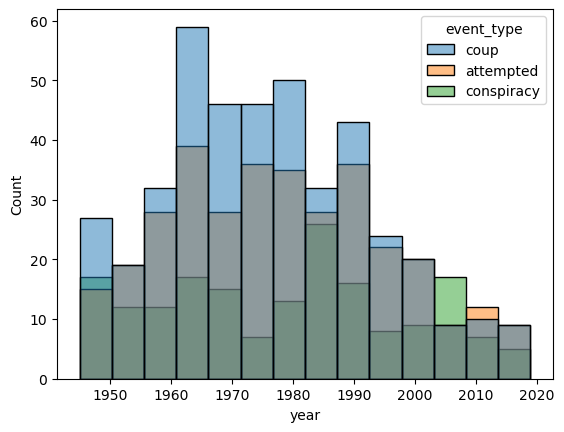

In [138]:
#coup['event_type'] = coup['event_type'].apply(lambda x: 1/coup.realized.value_counts()[1] if x == 1 else 1/coup.realized.value_counts()[0])
sns.histplot(data=coup, x='year', hue='event_type')
coup['event_type'].value_counts()

# Predictor Selection / Variable Recoding

We have a large of number of binary indicator variables that may seve better as unqiue values of categorical variables (as stated above), and will try to resolve some fo these here



In [ ]:
clean_coup = coup.copy()

# drop unrealized (just reverse of realized)
clean_coup.drop('unrealized', axis=1, inplace=True)

# drop attempt, conspiracy indicators (same info put into event_type)
clean_coup.drop(['attempt', 'conspiracy'], axis=1, inplace=True)




In [ ]:
coup[coup.country =='Nigeria']

In [ ]:
coup[coup.day == 0]

In [ ]:
coup['date'] = 

### TODO: Add region code based on the first number in the cowcode

CREATE COLUMN THAT COUNTS PREVIOUS COUPS IN THAT COUNTRY

In [ ]:
coup['day'] = np.where((coup.country == 'Nigeria') & (coup.year == 2017), 23, coup.day)

In [ ]:
coup['date'] = pd.to_datetime(coup[['year', 'month', 'day']])

In [ ]:
coup.sort_values(by=['country', 'date'],inplace=True)

In [ ]:
coup[coup.country == 'Afghanistan']

In [ ]:
coup.date.min()

In [ ]:
coup['past_coups'] = coup.groupby(['country'])['year'].transform(lambda x: x.rolling(100, min_periods=2).count()-1)
coup.fillna(0, inplace=True)

In [ ]:
coup['past_conspiracies'] = coup.groupby(['country'])['conspiracy'].transform(lambda x: x.rolling(100, min_periods=2).sum())
coup['past_conspiracies'] = np.where(coup.conspiracy == 1, coup.past_conspiracies -1, coup.past_conspiracies)
coup.fillna(0, inplace=True)

In [ ]:
coup[coup.realized==0].past_coups

In [ ]:
plt.boxplot([coup[coup.realized == 0].past_coups, coup[coup.realized == 1].past_coups])
plt.xlabel("Coup Status")
plt.ylabel("Number of past Coups")
plt.title("Number of past Coups by succe sses")
plt.xticks([1,2],['Not Realized','Realized'])
plt.show()

In [ ]:
plt.boxplot([coup[coup.realized == 0].past_conspiracies, coup[coup.realized == 1].past_conspiracies])
plt.xlabel("Coup Status")
plt.ylabel("Number of past conspiracies")
plt.title("Number of past Conspiracies by successes")
plt.xticks([1,2],['Not Realized','Realized'])
plt.show()

# Variables to Add

Note: There will be a lot of correlation within variables, probably need to pick some analysis that is robust to correlation.

Perhaps run different regressions with each of these (bc multicollinearity) to find which has the best R^2 -> shows which metric is best
Alternatively do PCA

Different types of coups will have different predictors?

*   GDP per Capita
*   Polity-5 (survey, autocratic patterns of authority)
*   Regime-type score (derivation of Polity-5)
*   Democracy index (Economic Intelligence Unit)
*   Judicial Independence (Global competitiveness from WEF)
*   Freedom House (political rights + civil liberties, probably longest lasting)
*   World Bank's Quality of Governance (has 6 indicators)
*   Economics Intelligence Unit (corruption)
*   Transparency International Corruption Perceptions Index
*   Coup in past X years (capture timeline)
*   sum total of past coups
*   Human Rights Index
*   Other COW
*   Past wars



Predict: Coups over the next 5 years in countries (including America!)



Beacons of Democracy? A Worldwide exploration of the relationship between democracy and lay participation in criminal cases  (2022)  Ivkovich & Hans


*   GDP per capita
*   year
*   political divide
*   Proportion of religious people (proportion of non-religious better bc of other religious categories; depends on surveys)
*   Previous coup in past X years
*   Proportion of dominant language?
*   investiate COW
*   Proportion of men
*   growing population?
*   Human Rights Index
*   month
*   Past coups

In [ ]:
predictors = list(coup.columns)[11:]